# Análisis de datos y uso de Gradient Boosting para la predicción de clientes desertores                          

## Contenido

#### 1. Introducción

    * Identificación del problema
    * Los datos como alternativa de solución
    * Objetivos
    
    
#### 2. Importación de librerías y carga de datos

    
#### 3. Exploración de los datos

    * Eliminación y codificación de variables
    
    
#### 4. Preprocesamiento de datos

    * Identificación de outliers
    * Identificación e imputación de valores faltantes
    
    
#### 5. Análisis y visualización de datos


#### 6. Transformación de datos

    * Rebalanceo de datos
    * Reducción de la dimensionalidad
    

#### 7. Construcción y evaluación del modelo predictivo

    * Elección de hiperparámetros
    * Comparación y elección del mejor modelo
    

#### 8. Conclusiones

---

## 1. Introducción

#### Identificación del problema

Se identifica que la problemática a tratar es el abandono de clientes a los servicios de una empresa de telecomunicaciones, es bien sabido que esta industria posee una tasa de abandono relativamente alta, variando entre el 15 y 20%, debido a que existe una gran competitividad en el mercado, por lo tanto al momento de replantearnos cuál o cuáles pueden ser los factores definitivos que propician el abandono de los clientes nos ponemos a pensar que puede ser causado por múltiples factores, desde un mal servicio, costes muy altos para su presupuesto, o porque simplemente desean probar otras opciones (lo que como ya mencionamos, es muy normal debido a la fuerte competencia en el sector). 
Debido a todo lo anterior mencionado, las empresas buscan a toda costa retener a sus clientes, y aqui es donde surge la interrogante, ¿A que cliente es al que debo retener?. Puesto que sin un analísis de los datos es imposible saber que clientes tienen intenciones de abandonar su servicio o no. Intentar ejecutar una retención individualizada a cada uno de sus clientes no es factible debido a que estas empresas cuentan con demasiadas personas suscritas a sus servicios, por lo cual seria una gran pérdida de tiempo intentar retener a esta gran cantidad de personas, además que se superaría rápidamente el presupuesto asignado para esta labor y sin aun lograr resultados convincentes.

#### Los datos como alternativa de solución

Llegado a este punto, es necesario que la empresa utilice los datos a su favor, los vea como un activo estratégico para la resolución de problemas y toma de decisiones acertivas, que en este caso es identificar los clientes propensos a abandonar su servicio y centrar todos sus esfuerzos en intentar retenerlos, a la vez que tambien los vea como una inversión, puesto que al solventar el problema de la deserción, lograrán tener mas clientes, y por ende, aumentar sus ingresos, los cuales pueden ser usados para mantener o incrementar su posición en el mercado o en otras tareas de mayor o igual relevancia. Para lograr este objetivo, utilizaremos el análisis exploratorio de los datos para lograr responder algunas preguntas acerca del comportamiento de los clientes y su relación con el abandono de la empresa, a la vez que aprovecharemos la potencia y eficacia que nos ofrecen los algoritmos de machine learning, para que dado una serie de caracteristicas del cliente, nos de una estimación concreta acerca si en el futuro abandonará los servicios de la empresa o no.

#### Objetivos

* Analizar los datos y encontrar patrones y comportamientos que expliquen la deserción de los clientes.
* Construir un modelo de aprendizaje automático para la predicción de clientes desertores en la empresa.


---

## 2. Importación de librerías y carga de datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTENC
import xgboost as xgb
from xgboost import XGBClassifier
import optuna  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

El conjunto de datos con el que vamos a tratar almacena características de 7043 clientes a los que una empresa de telecomunicaciones proporcionó servicios de telefonía e internet en el tercer trimestre del año, e indica si estos al final de este periodo de tiempo desertaron de sus servicios o no .

In [4]:
data = pd.read_csv("Telco_Churn.csv")

---

## 3. Exploración de los datos

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,NaN,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.shape

(7043, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6950 non-null   object 
 2   SeniorCitizen     6891 non-null   float64
 3   Partner           6798 non-null   object 
 4   Dependents        6780 non-null   object 
 5   tenure            6823 non-null   float64
 6   PhoneService      6726 non-null   object 
 7   MultipleLines     6641 non-null   object 
 8   InternetService   6731 non-null   object 
 9   OnlineSecurity    6692 non-null   object 
 10  OnlineBackup      6673 non-null   object 
 11  DeviceProtection  6812 non-null   object 
 12  TechSupport       6644 non-null   object 
 13  StreamingTV       6630 non-null   object 
 14  StreamingMovies   6573 non-null   object 
 15  Contract          6878 non-null   object 
 16  PaperlessBilling  6736 non-null   object 


#### Eliminación y codificación de variables

Obsevamos que en nuestro conjunto de datos tenemos una columna llamada "customerID", el cuál es un conjunto de números y letras que hacen referencia al ID del cliente, debido a que no es una variable relevante para nuestro estudio y construcción del modelo predictivo, se procederá a eliminarla.

In [10]:
data = data.drop(['customerID'], axis=1)

También se observa que algunas variables estan etiquetadas incorrectamente con un tipo de dato que no les corresponde, como en el caso de "SeniorCitizen":float y "TotalCharges":object, es por ello que se procederá a convertirlas al tipo de dato correcto.

In [11]:
# Conversión de la columna "SeniorCitizen" a object
data = data.astype({"SeniorCitizen":object})

In [12]:
# Conversión de la columna "TotalCharges" a float
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6950 non-null   object 
 1   SeniorCitizen     6891 non-null   object 
 2   Partner           6798 non-null   object 
 3   Dependents        6780 non-null   object 
 4   tenure            6823 non-null   float64
 5   PhoneService      6726 non-null   object 
 6   MultipleLines     6641 non-null   object 
 7   InternetService   6731 non-null   object 
 8   OnlineSecurity    6692 non-null   object 
 9   OnlineBackup      6673 non-null   object 
 10  DeviceProtection  6812 non-null   object 
 11  TechSupport       6644 non-null   object 
 12  StreamingTV       6630 non-null   object 
 13  StreamingMovies   6573 non-null   object 
 14  Contract          6878 non-null   object 
 15  PaperlessBilling  6736 non-null   object 
 16  PaymentMethod     6940 non-null   object 


Ahora podemos observar que cada variable esta codificada con el tipo de dato que le corresponde

---

## 4. Preprocesamiento de datos

#### Identificación de outliers

Mediante un diagrama de caja o bigote identificaremos visualmente si existen outliers en las columnas numéricas de nuestro conjunto de datos a través del rango intercuartílico.

Se separarán en dos gráficos, debido a que la variable "TotalCharges" posee valores muy altos en comparación con las demas variables, lo cual ocasiona que no se visabilizen bien los gráficos


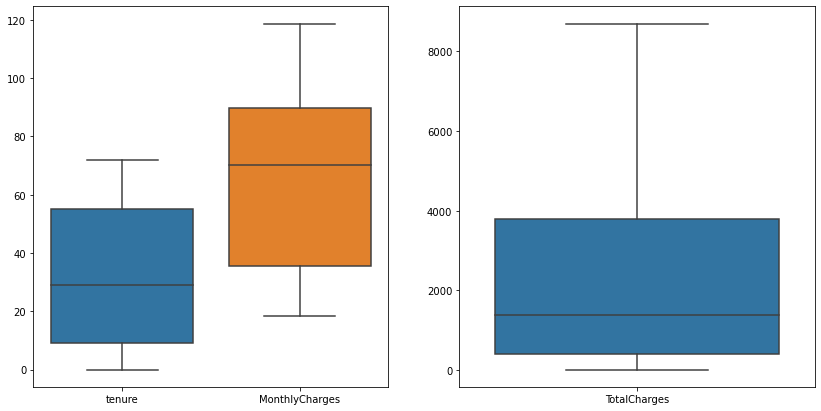

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.boxplot(ax=ax[0], data= data[["tenure", "MonthlyCharges"]])
sns.boxplot(ax=ax[1], data= data[["TotalCharges"]])
plt.show()

Podemos observar la inexistencia de outliers, por lo que no será necesario tomar medidas al respecto.

#### Identificación e imputación de valores faltantes

In [15]:
# Observamos cuantos valores faltantes hay en nuestro conjunto de datos
data.isnull().sum().sum()

4824

In [16]:
# Observamos cuantos valores faltantes hay en cada variable
data.isnull().sum()

gender               93
SeniorCitizen       152
Partner             245
Dependents          263
tenure              220
PhoneService        317
MultipleLines       402
InternetService     312
OnlineSecurity      351
OnlineBackup        370
DeviceProtection    231
TechSupport         399
StreamingTV         413
StreamingMovies     470
Contract            165
PaperlessBilling    307
PaymentMethod       103
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [18]:
# Y observamos el porcentaje de valores faltantes respecto del total de datos
data.isnull().sum().sum() / (data.shape[0] * (data.shape[1]-1)) * 100

3.6049231413049165

Los resultados nos arrojan un total de 4824 valores nulos de los 133817 que cuenta el conjunto de datos, estos valores nulos suponen un 3,6% del total de datos. Obtenida esta informacion, procederemos a imputarlos mediante el uso de algoritmos de regresión, técnica conocida con el nombre de imputación simple e imputación iterativa.

Para ello empezaremos a dividir nuestro conjunto de datos en tres grupos, el primero de variables numéricas, el segundo de variables categóricas y el último de la variable de salida, ya que las técnicas de imputacion para los dos primeros conjuntos seran distintas, y el tercer conjunto lo excluimos de la imputación puesto que nuestra variable de salida no puede influir en este proceso.

In [19]:
numericas = data.iloc[:, [4,17,18]]
categoricas = data.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]]
salida = data.iloc[:, -1]

Extraeremos los nombres tanto de nuestras variables categóricas como numéricas, ya que en el proceso de imputación estos nombres seran eliminados.

In [20]:
col_numericas = numericas.columns.values
col_categoricas = categoricas.columns.values

Empezaremos imputando nuestras variables categóricas mediante un imputador simple utilizando la técnica de reemplazar por el mas frecuente, es decir, la moda.

In [21]:
imputer_categorico = SimpleImputer(strategy='most_frequent')
imputer_categorico.fit(categoricas)
categoricas = imputer_categorico.transform(categoricas)

Y ahora le regresaremos el formato original en el que se encontraba en nuestro conjunto de datos

In [22]:
categoricas = pd.DataFrame(categoricas)
categoricas.columns = col_categoricas

Proseguiremos imputando nuestras variables numéricas mediante un imputador iterativo, utilizando el algoritmo de los bosques aleatorios de regresión para estimar los valores faltantes en base a los valores no faltantes de las demás variables. Cabe mencionar que no es necesario escalar nuestros datos numéricos cuando utilizamos un algoritmo Random Forest.

In [23]:
imputer_numerico = IterativeImputer(estimator=RandomForestRegressor())
imputer_numerico.fit(numericas)
numericas = imputer_numerico.transform(numericas)

Como hicimos con el conjunto anterior, le regresamos el formato original

In [24]:
numericas = pd.DataFrame(numericas)
numericas.columns = col_numericas

Y redondeamos los decimales para tener el mismo formato númerico de los datos originiales

In [25]:
numericas["tenure"] = numericas["tenure"].round()

Transformamos también la variable de salida a su formato original

In [26]:
salida = pd.DataFrame(salida)

Por último, unimos los tres conjuntos de datos para tener un solo DataFrame como al inicio de la sección

In [27]:
data = pd.concat([categoricas, numericas, salida], axis=1)

##### Comprobamos nuevamente si existen valores faltantes

In [28]:
data.isnull().sum().sum()

0

In [29]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Y ahora observamos que los métodos utilizados imputaron de forma satisfactoria los valores faltantes.